In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import requests
import csv
import xml.etree.ElementTree as ET

# De map en bestandsnaam waarin het CSV-bestand wordt opgeslagen
output_dir = 'zetel-data'
output_file = 'fractie-verdeling.csv'
output_path = os.path.join(output_dir, output_file)

# Zorg ervoor dat de doelmap bestaat
os.makedirs(output_dir, exist_ok=True)

# Functie om XML-data naar CSV te schrijven
def write_to_csv(entries, file_exists):
    with open(output_path, mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)

        # Schrijf de header alleen als het bestand nog niet bestaat
        if not file_exists:
            header = [
                'id', 'updated', 'nummer', 'afkorting', 'naamNl', 'naamEn', 'aantalZetels', 'aantalStemmen', 'datumActief', 'datumInactief'
            ]
            writer.writerow(header)

        # Doorloop elke 'entry' in het XML en haal de gegevens op
        for entry in entries:
            content = entry.find('atom:content', ns)
            if content is not None:
                fractie = content.find('tk:fractie', ns)
                if fractie is not None:
                    row = [
                        fractie.get('id'),
                        entry.find('atom:updated', ns).text,
                        fractie.find('tk:nummer', ns).text if fractie.find('tk:nummer', ns) is not None else '',
                        fractie.find('tk:afkorting', ns).text if fractie.find('tk:afkorting', ns) is not None else '',
                        fractie.find('tk:naamNl', ns).text if fractie.find('tk:naamNl', ns) is not None else '',
                        fractie.find('tk:naamEn', ns).text if fractie.find('tk:naamEn', ns) is not None else '',
                        fractie.find('tk:aantalZetels', ns).text if fractie.find('tk:aantalZetels', ns) is not None else '',
                        fractie.find('tk:aantalStemmen', ns).text if fractie.find('tk:aantalStemmen', ns) is not None else '',
                        fractie.find('tk:datumActief', ns).text if fractie.find('tk:datumActief', ns) is not None else '',
                        fractie.find('tk:datumInactief', ns).text if fractie.find('tk:datumInactief', ns) is not None else ''
                    ]
                    writer.writerow(row)
                else:
                    print(f"No 'fractie' element found in entry: {ET.tostring(entry, encoding='utf8').decode('utf8')}")
            else:
                print(f"No 'content' element found in entry: {ET.tostring(entry, encoding='utf8').decode('utf8')}")

# De URL van de API
url = 'https://gegevensmagazijn.tweedekamer.nl/SyncFeed/2.0/Feed?category=Fractie'

# Namespaces voor het parsen van XML
ns = {
    'atom': 'http://www.w3.org/2005/Atom',
    'tk': 'http://www.tweedekamer.nl/xsd/tkData/v1-0',
    'xsi': 'http://www.w3.org/2001/XMLSchema-instance'
}

# Variabele om bij te houden of het bestand al bestaat
file_exists = os.path.isfile(output_path)

while url:
    # Voer een GET-verzoek uit naar de API
    response = requests.get(url)
    
    # Controleer of het verzoek succesvol was
    if response.status_code == 200:
        # Parse het XML-antwoorden
        root = ET.fromstring(response.content)
        
        # Zoek alle 'entry' elementen in de XML
        entries = root.findall('atom:entry', ns)
        if entries:
            # Schrijf de gegevens naar een CSV-bestand
            write_to_csv(entries, file_exists)
            file_exists = True
            
            # Zoek de 'next' link voor de volgende pagina
            next_link = root.find('atom:link[@rel="next"]', ns)
            if next_link is not None:
                url = next_link.get('href')
            else:
                break  # Geen volgende pagina
        else:
            print(f"No entries found in response: {ET.tostring(root, encoding='utf8').decode('utf8')}")
            break
    else:
        print(f"Er is iets misgegaan bij het ophalen van de gegevens: {response.status_code}")
        break

print(f"Gegevens zijn succesvol naar '{output_path}' geschreven.")


Gegevens zijn succesvol naar 'zetel-data/fractie-verdeling.csv' geschreven.


/tmp/ipykernel_47191/1840860902.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zetels_df['aantalZetels'] = zetels_df['aantalZetels'].replace('', 0).astype(int)


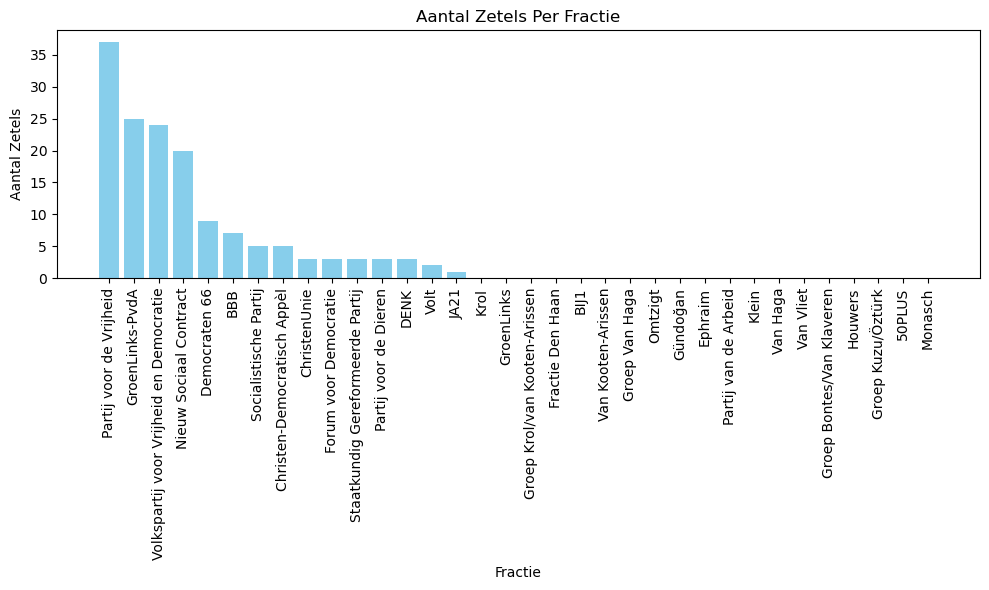

/tmp/ipykernel_47191/1840860902.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stemmen_df['aantalStemmen'] = stemmen_df['aantalStemmen'].replace('', 0).astype(int)


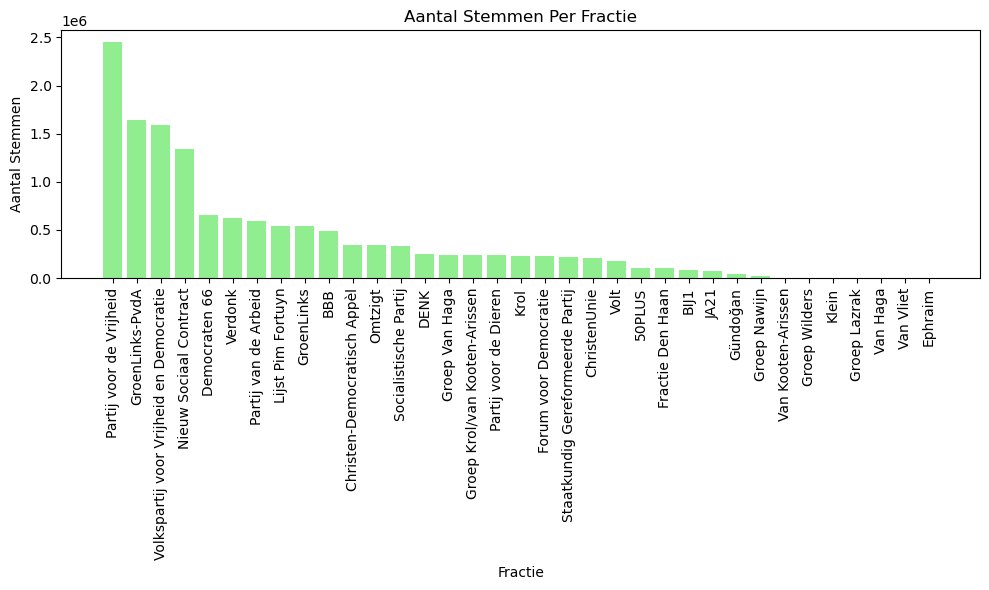

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-bestand inlezen
df = pd.read_csv('zetel-data/fractie-verdeling.csv')

# Aantal Zetels Per Fractie
def plot_aantal_zetels(df):
    zetels_df = df[df['aantalZetels'].notna() & (df['aantalZetels'] != '')]
    zetels_df['aantalZetels'] = zetels_df['aantalZetels'].replace('', 0).astype(int)

    # Sorteren op aantal zetels
    zetels_df = zetels_df.sort_values(by='aantalZetels', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(zetels_df['naamNl'], zetels_df['aantalZetels'], color='skyblue')
    plt.xlabel('Fractie')
    plt.ylabel('Aantal Zetels')
    plt.title('Aantal Zetels Per Fractie')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Aantal Stemmen Per Fractie
def plot_aantal_stemmen(df):
    stemmen_df = df[df['aantalStemmen'].notna() & (df['aantalStemmen'] != '')]
    stemmen_df['aantalStemmen'] = stemmen_df['aantalStemmen'].replace('', 0).astype(int)

    # Sorteren op aantal stemmen
    stemmen_df = stemmen_df.sort_values(by='aantalStemmen', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(stemmen_df['naamNl'], stemmen_df['aantalStemmen'], color='lightgreen')
    plt.xlabel('Fractie')
    plt.ylabel('Aantal Stemmen')
    plt.title('Aantal Stemmen Per Fractie')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_aantal_zetels(df)
plot_aantal_stemmen(df)


/tmp/ipykernel_47191/1550558181.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zetels_df['aantalZetels'] = zetels_df['aantalZetels'].replace('', 0).astype(int)


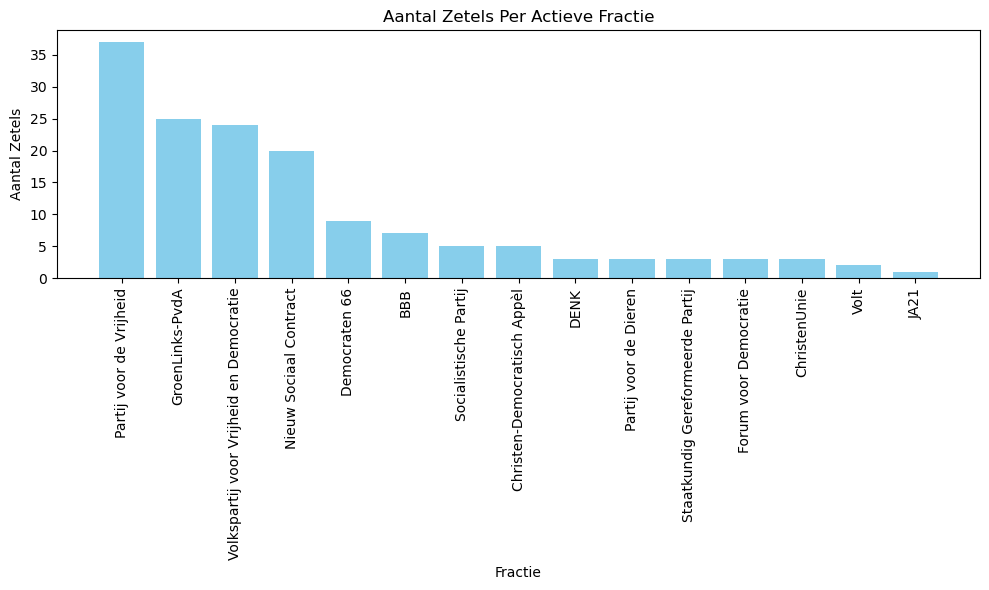

/tmp/ipykernel_47191/1550558181.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stemmen_df['aantalStemmen'] = stemmen_df['aantalStemmen'].replace('', 0).astype(int)


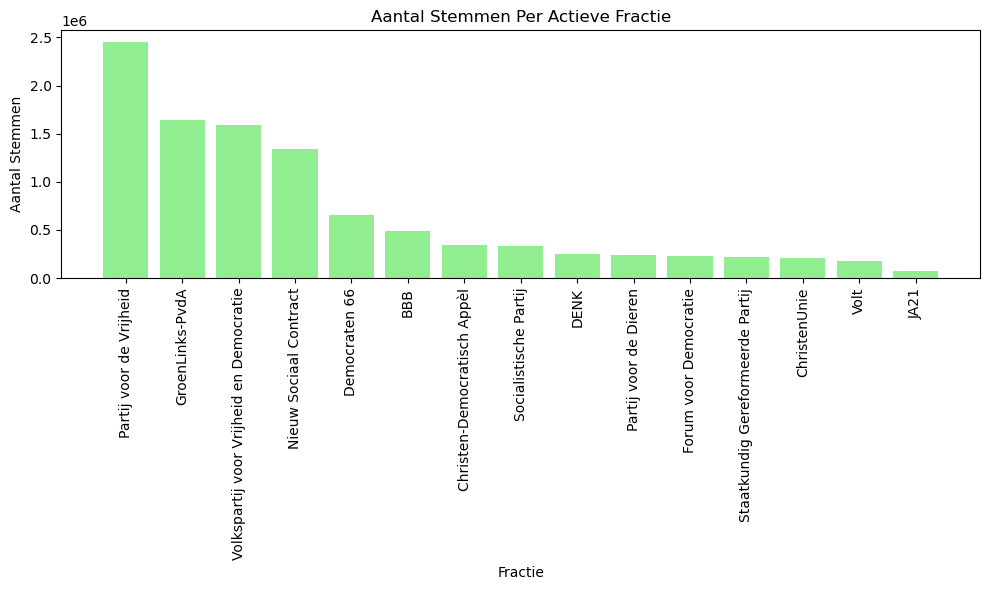

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-bestand inlezen
df = pd.read_csv('zetel-data/fractie-verdeling.csv')

# Filter voor actieve fracties
actieve_fracties = df[df['datumInactief'].isna() | (df['datumInactief'] == '')]

# Aantal Zetels Per Actieve Fractie
def plot_aantal_zetels(df):
    zetels_df = df[(df['aantalZetels'].notna()) & (df['aantalZetels'] != '')]
    zetels_df['aantalZetels'] = zetels_df['aantalZetels'].replace('', 0).astype(int)

    # Sorteren op aantal zetels
    zetels_df = zetels_df.sort_values(by='aantalZetels', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(zetels_df['naamNl'], zetels_df['aantalZetels'], color='skyblue')
    plt.xlabel('Fractie')
    plt.ylabel('Aantal Zetels')
    plt.title('Aantal Zetels Per Actieve Fractie')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Aantal Stemmen Per Actieve Fractie
def plot_aantal_stemmen(df):
    stemmen_df = df[(df['aantalStemmen'].notna()) & (df['aantalStemmen'] != '')]
    stemmen_df['aantalStemmen'] = stemmen_df['aantalStemmen'].replace('', 0).astype(int)

    # Sorteren op aantal stemmen
    stemmen_df = stemmen_df.sort_values(by='aantalStemmen', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(stemmen_df['naamNl'], stemmen_df['aantalStemmen'], color='lightgreen')
    plt.xlabel('Fractie')
    plt.ylabel('Aantal Stemmen')
    plt.title('Aantal Stemmen Per Actieve Fractie')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_aantal_zetels(actieve_fracties)
plot_aantal_stemmen(actieve_fracties)


In [5]:
import pandas as pd

# CSV-bestanden inlezen
df_1918_1956 = pd.read_csv('zetel-data/verkiezingsuitslag/Historische_zetelverdeling_Tweede_Kamer_1918-1956.csv')
df_1956_1998 = pd.read_csv('zetel-data/verkiezingsuitslag/Historische_zetelverdeling_Tweede_Kamer_1956-1998.csv')
df_2002_2023 = pd.read_csv('zetel-data/verkiezingsuitslag/Historische_zetelverdeling_Tweede_Kamer_2002-2023.csv')

# Omzetten naar een long format
def melt_dataframe(df):
    return df.melt(id_vars=['Partij'], var_name='Jaar', value_name='Zetels')

df_long_1918_1956 = melt_dataframe(df_1918_1956)
df_long_1956_1998 = melt_dataframe(df_1956_1998)
df_long_2002_2023 = melt_dataframe(df_2002_2023)

# Combineer alle gesmolten dataframes
combined_long = pd.concat([df_long_1918_1956, df_long_1956_1998, df_long_2002_2023])

# Omzetten van jaartal en zetels naar correcte typen
combined_long['Jaar'] = combined_long['Jaar'].astype(int)
combined_long['Zetels'] = combined_long['Zetels'].fillna(0).astype(int)

# Scheiden op basis van zetelverdeling (100 of 150)
year_threshold_1956 = 1956

df_zetels100 = combined_long[combined_long['Jaar'] < year_threshold_1956]
df_zetels150 = combined_long[combined_long['Jaar'] >= year_threshold_1956]

# Check voor het jaar 1956 moet apart behandeld worden
df_1956_in_100 = df_zetels100[df_zetels100['Jaar'] == year_threshold_1956]
df_1956_in_150 = df_zetels150[df_zetels150['Jaar'] == year_threshold_1956]

# Merge separate datasets for year 1956 back to ensure continuity
df_zetels100 = combined_long[combined_long['Jaar'] < year_threshold_1956]
df_zetels150 = combined_long[combined_long['Jaar'] >= year_threshold_1956]

# Special handling for year 1956 which is in both datasets as clarified
df_zetels150_with_1956 = pd.concat([df_zetels150, df_1956_in_150])
df_zetels100_with_1956 = pd.concat([df_zetels100, df_1956_in_100])

# Remove exact duplicate records
df_zetels100_with_1956.drop_duplicates(subset=['Jaar', 'Partij'], inplace=True)
df_zetels150_with_1956.drop_duplicates(subset=['Jaar', 'Partij'], inplace=True)

# Remove 'Totaal' records
df_zetels100_with_1956 = df_zetels100_with_1956[df_zetels100_with_1956['Partij'] != 'Totaal']
df_zetels150_with_1956 = df_zetels150_with_1956[df_zetels150_with_1956['Partij'] != 'Totaal']

# Data output naar CSVs
df_zetels100_with_1956.to_csv('zetel-data/tk_zetels100_1918-1956.csv', index=False)
df_zetels150_with_1956.to_csv('zetel-data/tk_zetels150_1956-2023.csv', index=False)

print("Dataframes met correcte zetelverdelingen succesvol geschreven naar CSV-bestanden.")


Dataframes met correcte zetelverdelingen succesvol geschreven naar CSV-bestanden.


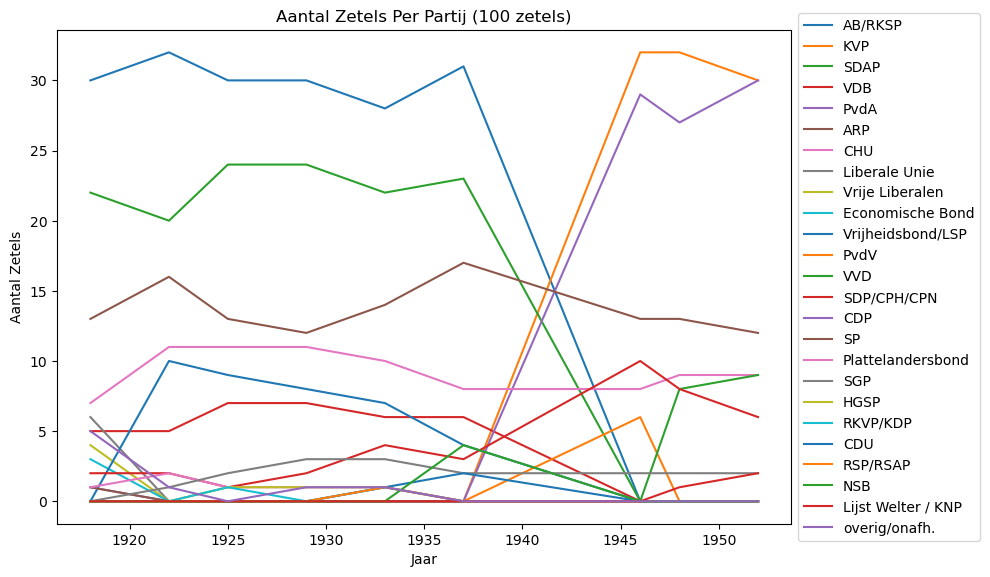

/tmp/ipykernel_47191/2729781912.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


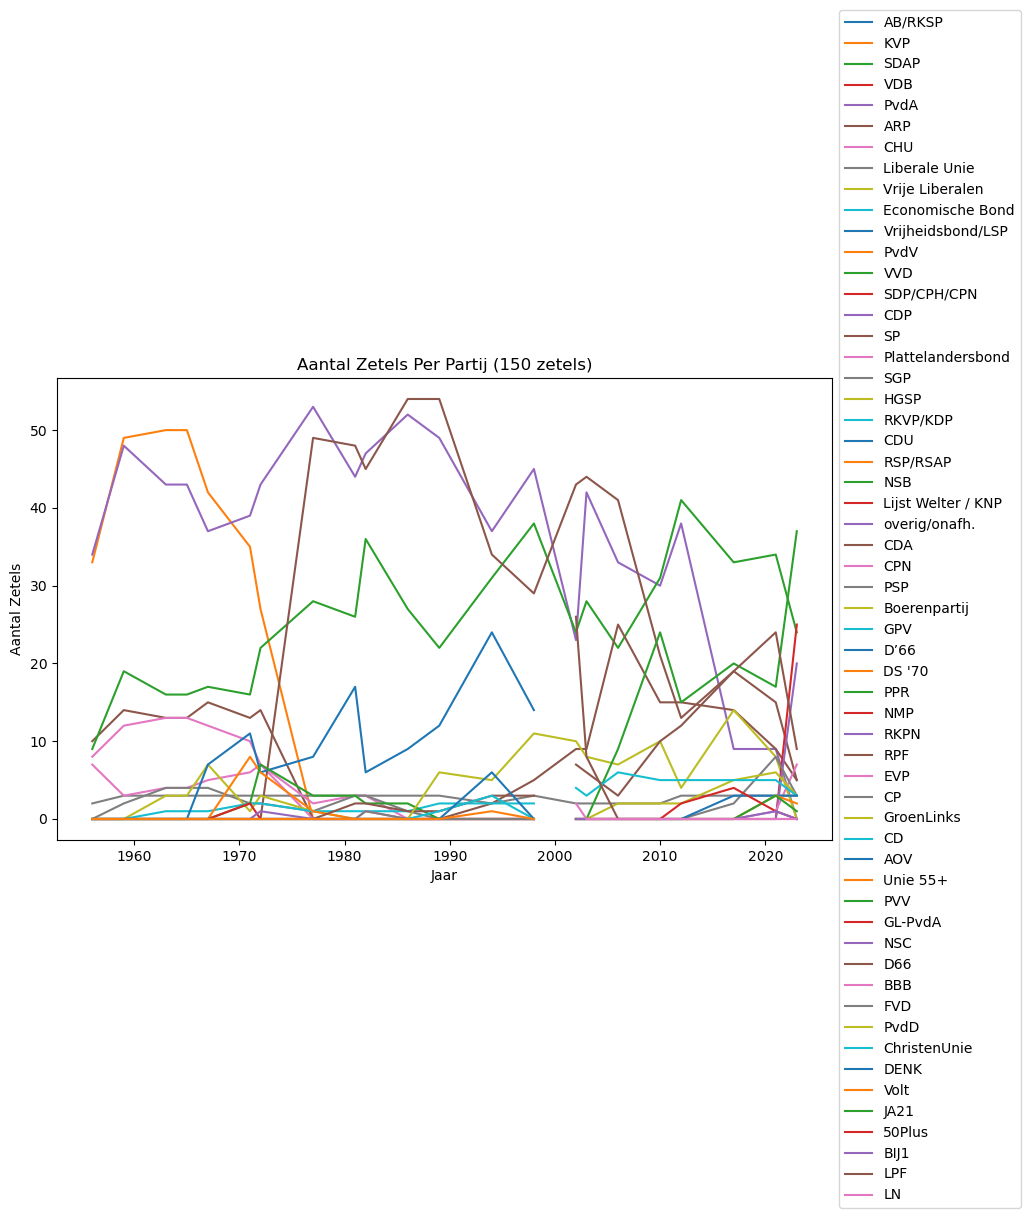

In [ ]:
df_zetels100 = pd.read_csv('zetel-data/tk_zetels100_1918-1956.csv')
df_zetels150 = pd.read_csv('zetel-data/tk_zetels150_1956-2023.csv')

# Aantal zetels per partij voor zetelverdeling van 100 zetels
def plot_zetels100(df):
    plt.figure(figsize=(10, 6))
    for party in df['Partij'].unique():
        party_data = df[df['Partij'] == party]
        plt.plot(party_data['Jaar'], party_data['Zetels'], label=party)

    plt.xlabel('Jaar')
    plt.ylabel('Aantal Zetels')
    plt.title('Aantal Zetels Per Partij (100 zetels)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

# Aantal zetels per partij voor zetelverdeling van 150 zetels
def plot_zetels150(df):
    plt.figure(figsize=(10, 6))
    for party in df['Partij'].unique():
        party_data = df[df['Partij'] == party]
        plt.plot(party_data['Jaar'], party_data['Zetels'], label=party)

    plt.xlabel('Jaar')
    plt.ylabel('Aantal Zetels')
    plt.title('Aantal Zetels Per Partij (150 zetels)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

plot_zetels100(df_zetels100)
plot_zetels150(df_zetels150)

<Figure size 1200x800 with 0 Axes>

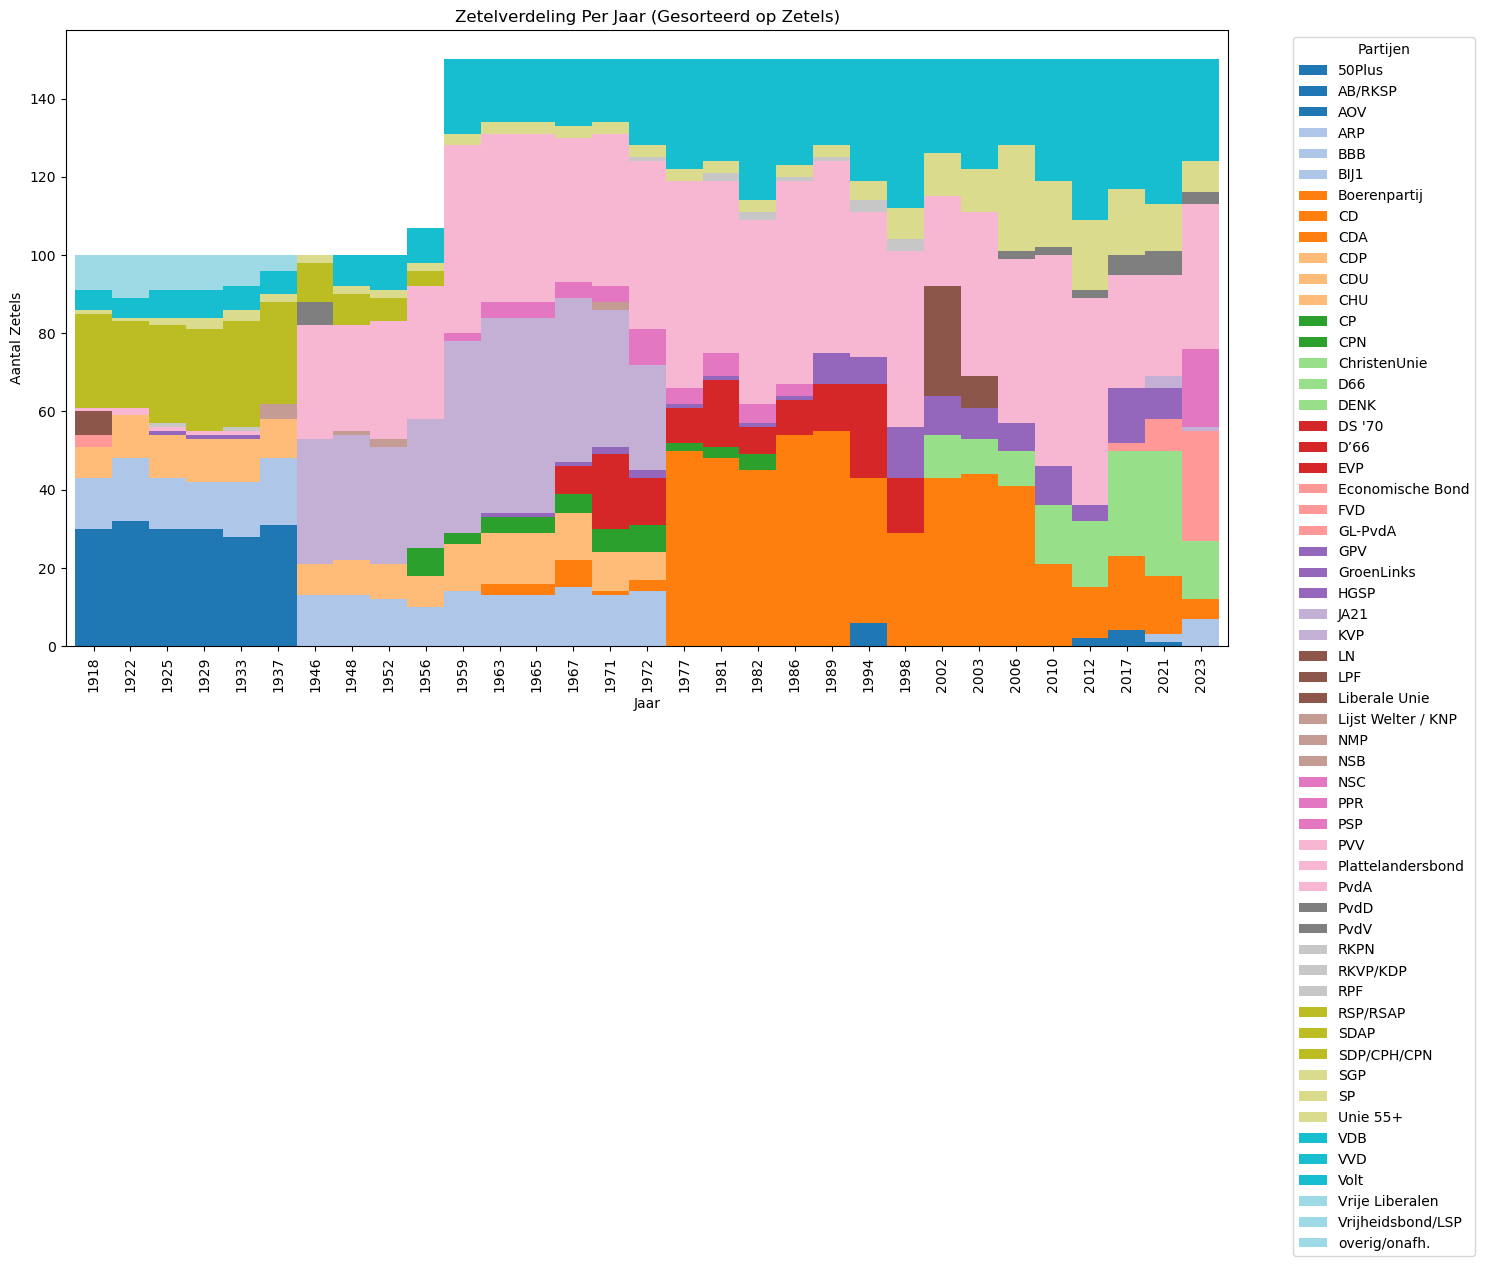

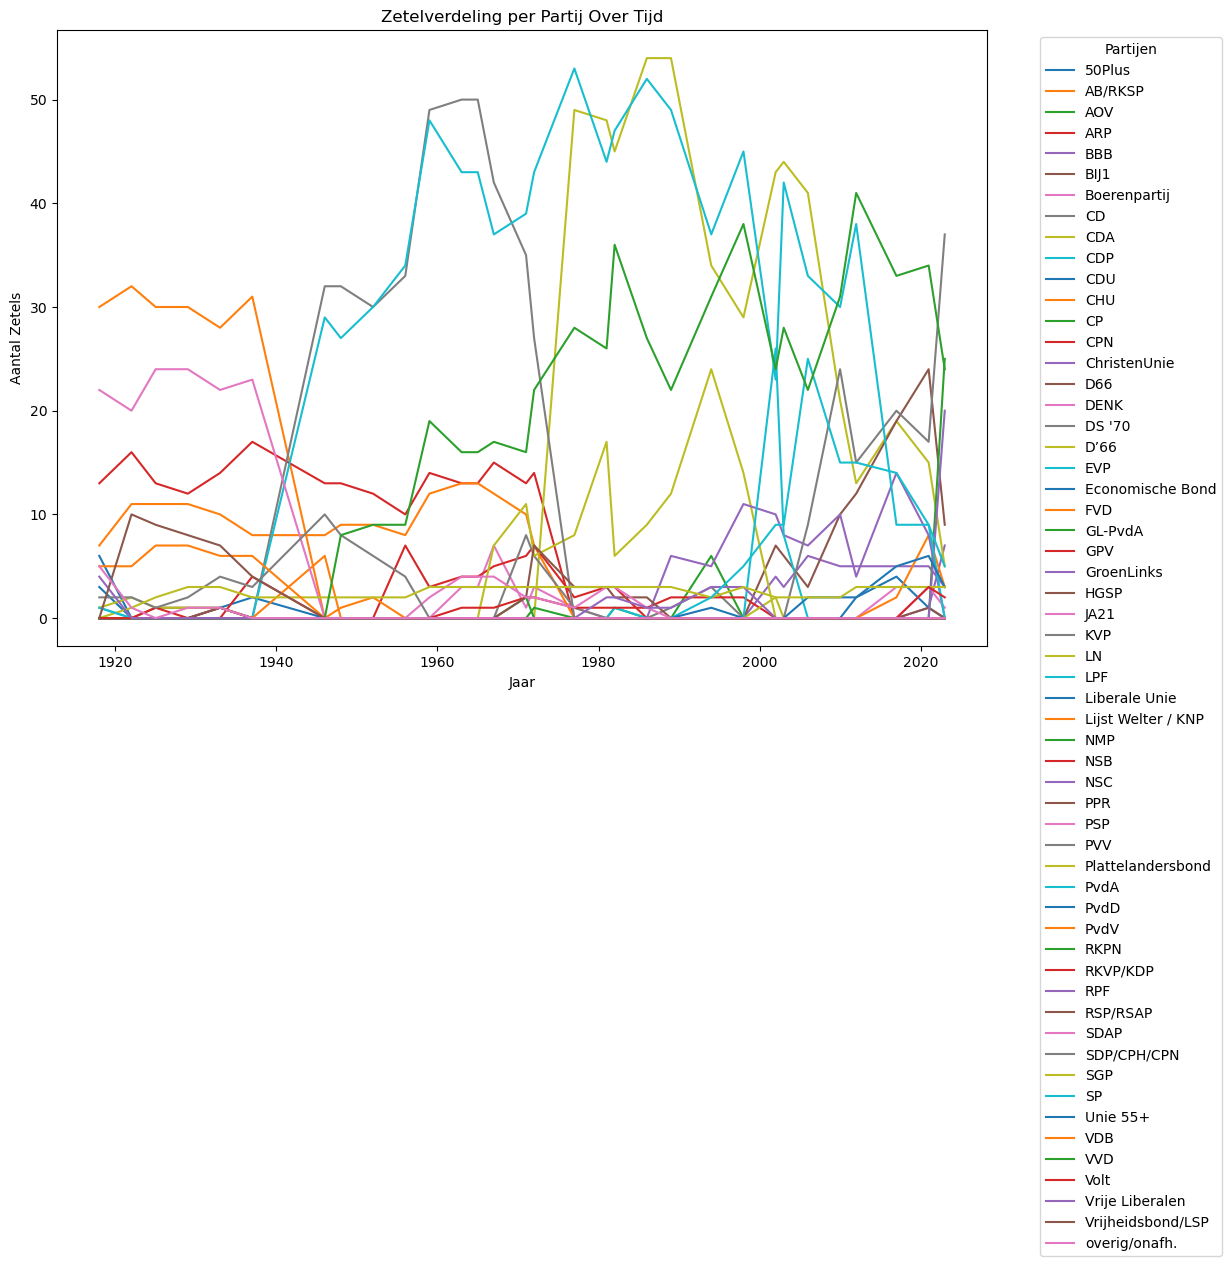

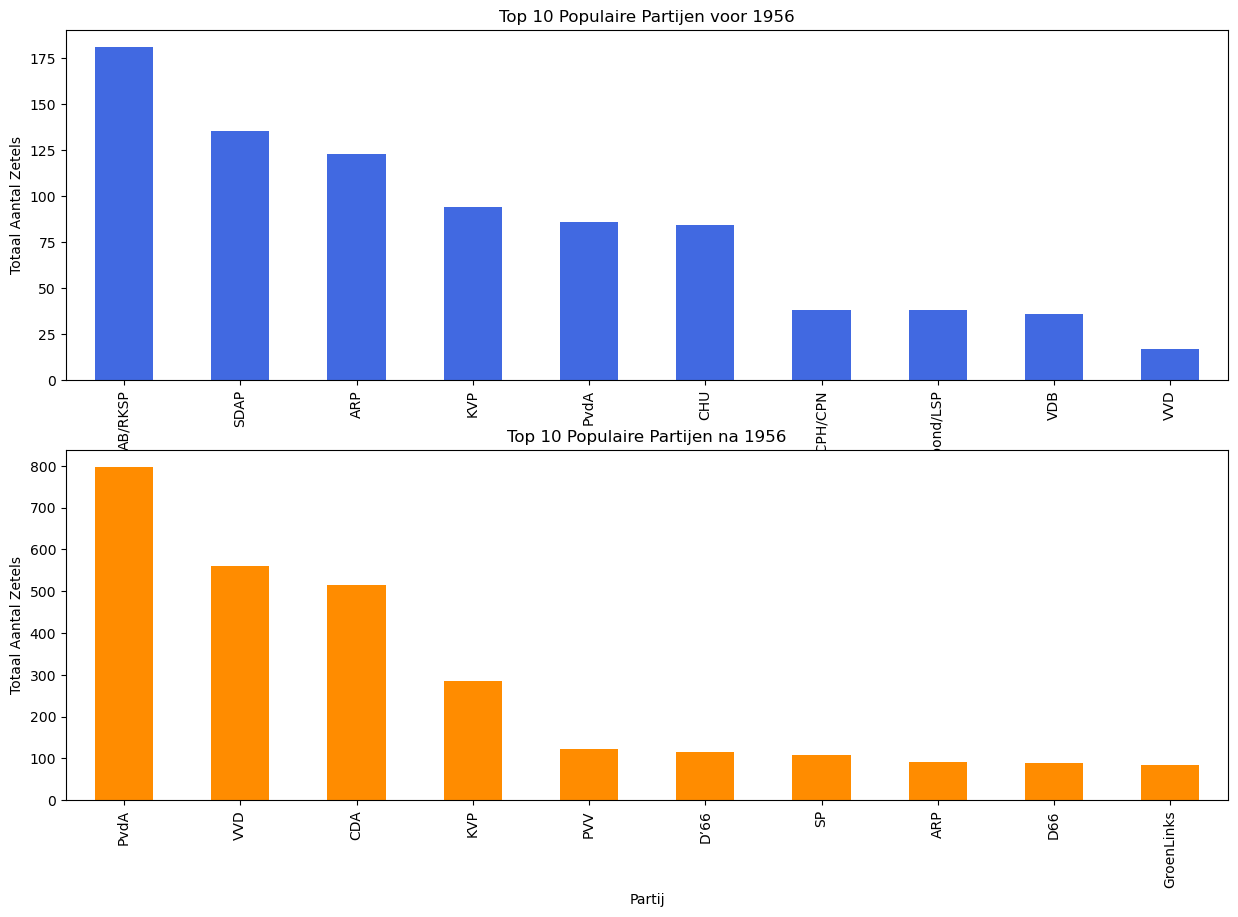

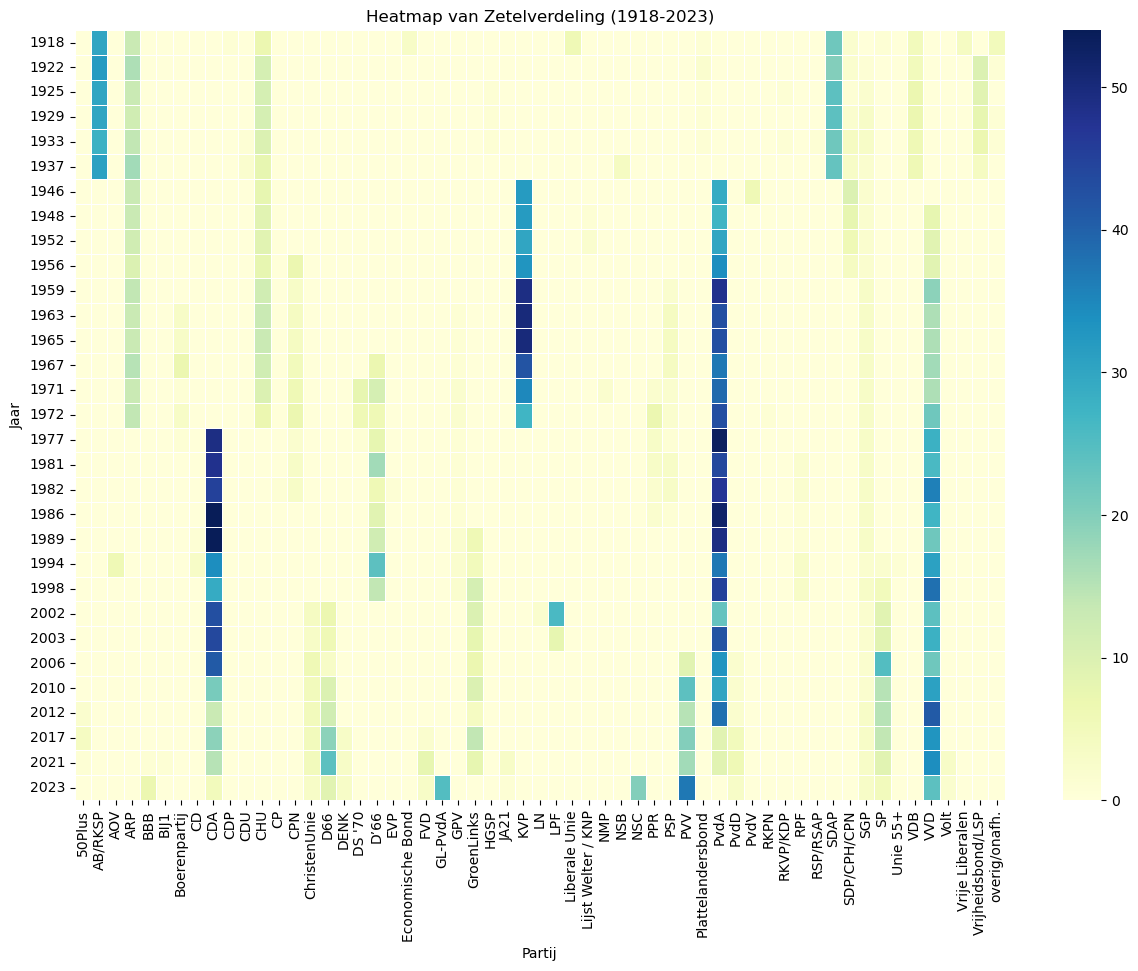

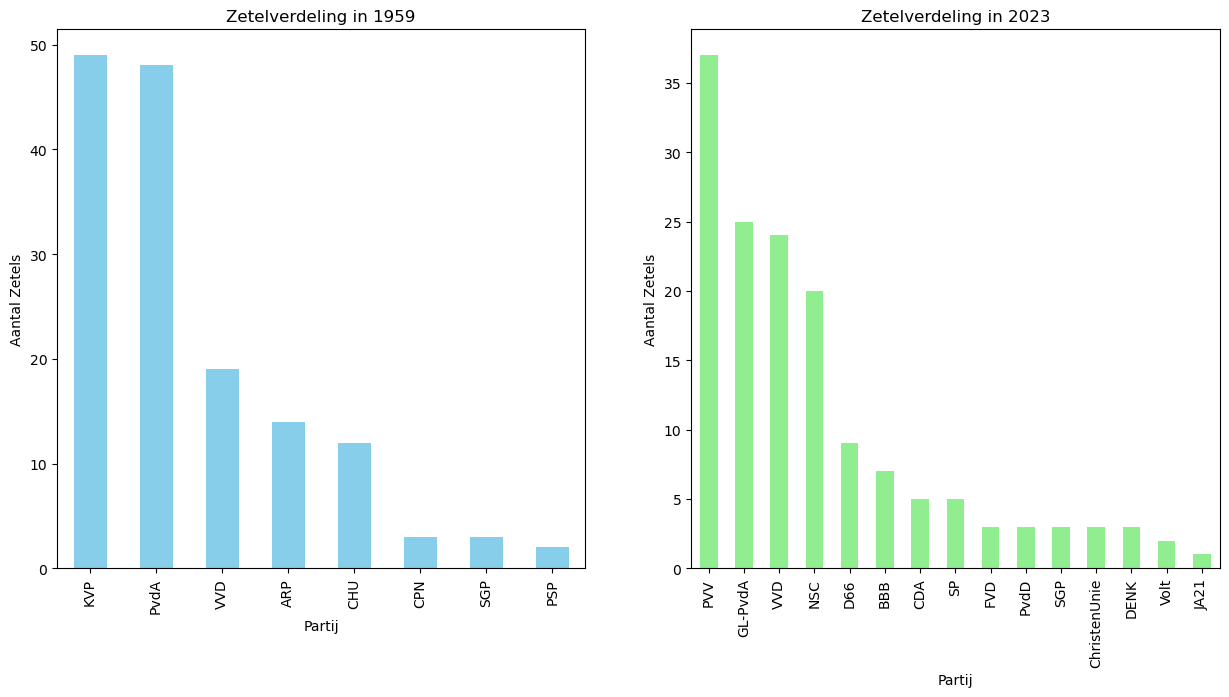

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combineer beide DataFrames voor plots
combined_df = pd.concat([df_zetels100, df_zetels150])

# 1. Stapeldiagram van Zetelverdeling Per Jaar
plt.figure(figsize=(12, 8))
df_pivot = combined_df.pivot(index='Jaar', columns='Partij', values='Zetels').fillna(0)
df_pivot.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20', width=1.0)
plt.ylabel('Aantal Zetels')
plt.xlabel('Jaar')
plt.title('Zetelverdeling Per Jaar (Gesorteerd op Zetels)')
plt.legend(title='Partijen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Lijngrafiek van Partijen Over Tijd
plt.figure(figsize=(12, 8))
for partij in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[partij], label=partij)
plt.ylabel('Aantal Zetels')
plt.xlabel('Jaar')
plt.title('Zetelverdeling per Partij Over Tijd')
plt.legend(title='Partijen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Balkgrafiek van Populaire Partijen per Tijdperk
df_voor_1956 = df_zetels100.groupby('Partij')['Zetels'].sum().sort_values(ascending=False).head(10)
df_na_1956 = df_zetels150.groupby('Partij')['Zetels'].sum().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
df_voor_1956.plot(kind='bar', ax=axes[0], color='royalblue')
axes[0].set_title('Top 10 Populaire Partijen voor 1956')
axes[0].set_ylabel('Totaal Aantal Zetels')

df_na_1956.plot(kind='bar', ax=axes[1], color='darkorange')
axes[1].set_title('Top 10 Populaire Partijen na 1956')
axes[1].set_ylabel('Totaal Aantal Zetels')

plt.show()

# 4. Heatmap van Zetelverdeling
plt.figure(figsize=(15, 10))
sns.heatmap(df_pivot, cmap="YlGnBu", cbar=True, linewidths=.5)
plt.ylabel('Jaar')
plt.xlabel('Partij')
plt.title('Heatmap van Zetelverdeling (1918-2023)')
plt.show()

#  5. Barchart voor Specifieke Verkiezingen
# Voorbeelden voor de jaren 1956 en 2021
df_1959 = combined_df[(combined_df['Jaar'] == 1959) & (combined_df['Zetels'] > 0)].set_index('Partij')['Zetels'].sort_values(ascending=False)
df_2023 = combined_df[(combined_df['Jaar'] == 2023) & (combined_df['Zetels'] > 0)].set_index('Partij')['Zetels'].sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

df_1959.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Zetelverdeling in 1959')
axes[0].set_xlabel('Partij')
axes[0].set_ylabel('Aantal Zetels')

df_2023.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Zetelverdeling in 2023')
axes[1].set_xlabel('Partij')
axes[1].set_ylabel('Aantal Zetels')
plt.show()
